Start your notebook here:

In [2]:
import sys
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from dateutil.parser import parse

In [3]:
filepath = "spotify-songs.csv"
data = pd.read_csv(filepath, encoding='ISO-8859-1')
# the encoding part, index_col,.. really depends on which kind of file you're using.

In [4]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [5]:
print(f"Gives the amount of rows & columns in the entire dataframe: {data.shape}")


Gives the amount of rows & columns in the entire dataframe: (953, 24)


Getting info of the database:

In [6]:
data.info()
print("\n\nRange Data 13(in_shazam_charts) & 15(key) have less non-null values")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

To make a separate & clear table of the missing data, we can do it this way:

In [7]:
total_null_values = data.isnull().sum().sort_values(ascending=False)
percentage = ((data.isnull().sum() / data.isnull().count()) * 100).sort_values(ascending=False)
print(f"Total records: {data.shape[0]}\nTotal missing for key: 95\nTotal missing for in_shazam_charts: 50")

missing_data = pd.concat([total_null_values, percentage.round(1)], axis=1, keys=['Total Missing', 'In Percentage'])
missing_data

Total records: 953
Total missing for key: 95
Total missing for in_shazam_charts: 50


,Total Missing,In Percentage
key,95,10.0
in_shazam_charts,50,5.2
track_name,0,0.0
artist(s)_name,0,0.0
liveness_%,0,0.0
instrumentalness_%,0,0.0
acousticness_%,0,0.0
energy_%,0,0.0
valence_%,0,0.0
danceability_%,0,0.0


To manually replace those missing values with the average of all ratings & just simply replacing missing data for example, you do it this way:

(Keep in mind that sometimes, you may find out that the data you're trying to figure out isn't as easy as expected to convert or replace. This is the perfect example/exercise for it.)

In [8]:
print(data['in_shazam_charts'].dtype)     # Here we check the dtype of the column

# Now to avoid having any errors with the replacements aka strings & numerics, we convert the column
# to numeric values.
data['in_shazam_charts'] = pd.to_numeric(data['in_shazam_charts'], errors='coerce')
mean_rating = data['in_shazam_charts'].mean()
# Without conversion, it would give errors regarding 'concatting str with str but no ints'.

data['in_shazam_charts'] = data['in_shazam_charts'].replace(np.nan, mean_rating)
data['key'] = data['key'].replace(np.nan, "Unknown")

object


Let's check if our replacements have been properly done now:

In [9]:
total_null_values = data.isnull().sum().sort_values(ascending=False)
percentage = ((data.isnull().sum() / data.isnull().count()) * 100).sort_values(ascending=False)
print(f"Total records: {data.shape[0]}\nTotal missing for key: 0\nTotal missing for in_shazam_charts: 0")

missing_data = pd.concat([total_null_values, percentage.round(1)], axis=1, keys=['Total Missing', 'In Percentage'])
missing_data

Total records: 953
Total missing for key: 0
Total missing for in_shazam_charts: 0


,Total Missing,In Percentage
track_name,0,0.0
artist(s)_name,0,0.0
liveness_%,0,0.0
instrumentalness_%,0,0.0
acousticness_%,0,0.0
energy_%,0,0.0
valence_%,0,0.0
danceability_%,0,0.0
mode,0,0.0
key,0,0.0


As we can see with the table shown above, it has been changed effectively.

<h3>Finding Duplicates within the Database</h3>

Functions with finding & removing duplicates:

In [10]:
duplicates = data[data.duplicated()]

duplicates.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%


Luckily, the CSV file I took from Kaggle seems quite clean and there hasn't been any duplicates found.

Hence, we do not need to proceed with replacing any duplicates, but here's the function just in case:

In [11]:
print(f"Data before dropping the duplicates:{data.shape}")
data = data.drop_duplicates()
print(f"Data after dropping the duplicates:{data.shape}")

Data before dropping the duplicates:(953, 24)
Data after dropping the duplicates:(953, 24)


<h3>Database with games.csv, converting datatypes</h3>

Since my csv file has separated dates within 3 columns and I would like to use specific commands to change datetime objects, I will proceed with using the games.csv file. To also avoid errors with the conversion, we are going to replace the unreleased ones.

In [15]:
filepath2 = "../games.csv"
data2 = pd.read_csv(filepath2,index_col = 0)
# index_col is just indicating that there is a row number stored in the first column
data2 = data2.drop_duplicates()


mean_rating = data2['Rating'].mean()
# Replace missing values aka NaN
data2['Rating'] = data2['Rating'].replace(np.nan, mean_rating)
data2['Team'] = data2['Team'].replace(np.nan, "['Unknown Team']")
data2['Summary'] = data2['Summary'].replace(np.nan, 'Unknown Summary')


# To avoid having issues with converting the dates, we replace the missing values once again:
dt = datetime.now()
dt_str = dt.strftime('%b %d, %Y')
data2['Release Date'] = data2['Release Date'].str.replace('releases on TBD', dt_str)
# convert the date column to a datetime object
data2['Release Date'] = pd.to_datetime(data2['Release Date'])

data2['Day'] = data2['Release Date'].dt.day
data2['Month'] = data2['Release Date'].dt.strftime('%b')
data2['Year'] = data2['Release Date'].dt.year
data2['Week day'] = data2['Release Date'].dt.day_name()

Table with the conversion completed:

In [16]:
data2.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Day,Month,Year,Week day
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K,25,Feb,2022,Friday
1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K,10,Dec,2019,Tuesday
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K,3,Mar,2017,Friday
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K,15,Sep,2015,Tuesday
4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K,24,Feb,2017,Friday


Now for example you want to have 'Times Listed' & 'Number of Reviews' shown as a numeric value, here's how you proceed:

In [17]:
# K represents 1000 so we multiply by 1000 in all these columns

data2['Times Listed'] = data2['Times Listed'].str.replace('K', '').astype(float) * 1000
data2['Number of Reviews'] = data2['Number of Reviews'].str.replace('K', '').astype(float) * 1000
data2['Plays'] = data2['Plays'].str.replace('K', '').astype(float) * 1000
data2['Playing'] = data2['Playing'].str.replace('K', '').astype(float) * 1000
data2['Backlogs'] = data2['Backlogs'].str.replace('K', '').astype(float) * 1000
data2['Wishlist'] = data2['Wishlist'].str.replace('K', '').astype(float) * 1000

data2.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Day,Month,Year,Week day
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900.0,3900.0,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000.0,3800.0,4600.0,4800.0,25,Feb,2022,Friday
1,Hades,2019-12-10,['Supergiant Games'],4.3,2900.0,2900.0,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000.0,3200.0,6300.0,3600.0,10,Dec,2019,Tuesday
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300.0,4300.0,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000.0,2500.0,5000.0,2600.0,3,Mar,2017,Friday
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3500.0,3500.0,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000.0,679000.0,4900.0,1800.0,15,Sep,2015,Tuesday
4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3000.0,3000.0,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000.0,2400.0,8300.0,2300.0,24,Feb,2017,Friday


<h3>Back to our Spotify Database</h3>

Alrighty, now let's switch back to our spotify statistics database.

If you want to describe the statistics, you can do it this way:

In [18]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,51.176339,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,122.642749,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,4.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,51.176339,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,953.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


<h3>Database with games.csv, text variables & separating lists</h3>
Since my spotify-songs.csv doesn't have any list included, let's proceed with using the games.csv as an example.

In [19]:
data2['Team'] = data2['Team'].apply(lambda x: ast.literal_eval(x))

# create a sample DataFrame with a column containing multiple values
df_team = pd.DataFrame({
    'Title': data2['Title'].tolist(),
    'Team': data2['Team'].tolist()
})
# use the explode method to transform the 'Team' column
df_team = df_team.explode('Team')
df_team

,Title,Team
0,Elden Ring,Bandai Namco Entertainment
0,Elden Ring,FromSoftware
1,Hades,Supergiant Games
2,The Legend of Zelda: Breath of the Wild,Nintendo
2,The Legend of Zelda: Breath of the Wild,Nintendo EPD Production Group No. 3
...,...,...
1126,Team Sonic Racing,Sega
1127,Dragon's Dogma,Capcom
1128,Baldur's Gate 3,Larian Studios
1129,The LEGO Movie Videogame,WB Games


As you can tell, the 'teams' & 'genres' are being separated from the lists.

In [20]:
data2['Genres'] = data2['Genres'].apply(lambda x: ast.literal_eval(x))

# create a sample DataFrame with a column containing multiple values
df_genres = pd.DataFrame({
    'Title': data2['Title'].tolist(),
    'Genres': data2['Genres'].tolist()
})
# use the explode method to transform the 'Team' column
df_genres = df_genres.explode('Genres')
df_genres

,Title,Genres
0,Elden Ring,Adventure
0,Elden Ring,RPG
1,Hades,Adventure
1,Hades,Brawler
1,Hades,Indie
...,...,...
1128,Baldur's Gate 3,Strategy
1128,Baldur's Gate 3,Tactical
1128,Baldur's Gate 3,Turn Based Strategy
1129,The LEGO Movie Videogame,Adventure


<h3>Data Visualization with my spotify songs csv file</h3>
Let's make a few examples of graphs. Let's start with a histogram:

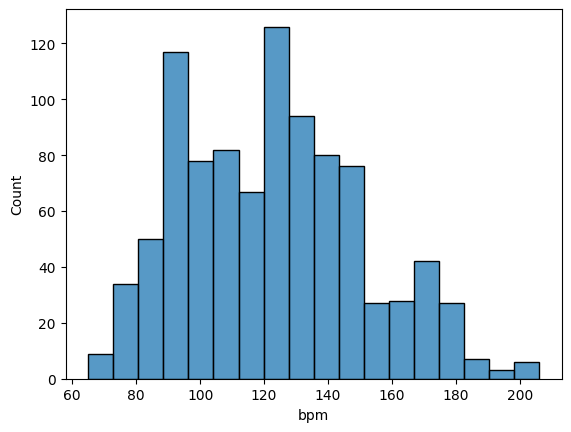

In [21]:
top_rating = data[['in_spotify_playlists', 'bpm']].sort_values(by = 'bpm', ascending= False)

sns.histplot(data = data['bpm'])

plt.show()

Here it shows a histogram of bpm songs that are being implemented within spotify playlists.
Now it's great and all but, do we know if they based upon acoustics and/or liveness?

To proceed further & getting more detailed, we can do it like this:

In [ ]:
data['artist(s)_name'] = data['artist(s)_name'].apply(lambda x: x.split(', '))
# separating the artists within the lists.

Proceeding with the bar graph:

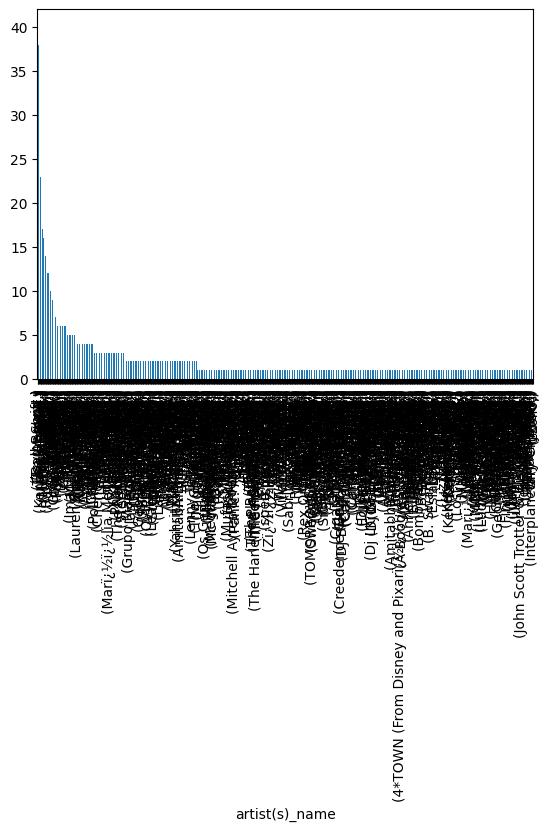

In [26]:
df_artists = pd.DataFrame({
    'track_name': data['track_name'].tolist(),
    'artist(s)_name': data['artist(s)_name'].tolist()
})
df_artists = df_artists.explode('artist(s)_name')

list_artists = pd.DataFrame(df_artists['artist(s)_name'])
count_artists = list_artists.value_counts().plot(kind='bar')

The reason why it's so cluttered is quite clear, the CSV file has a lot of data which makes it impossible to put it in such a small graph with clear details.

Now, here's the pie version:

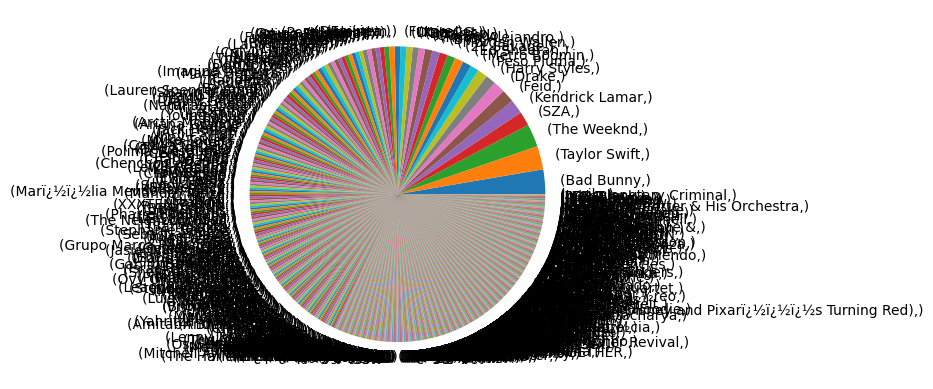

In [27]:
count_artists = list_artists.value_counts().plot(kind='pie')

This time it's a tad bit better, but still insanely cluttered. You do however, notice that Bad Bunny, Taylor Swift & The Weeknd are on the top.

Now, how would we proceed onto making a less cluttered chart? We start by counting the amount of artists:

In [30]:
artists_count = pd.DataFrame(list_artists.value_counts().rename_axis('unique_artists'))
artists_count

# Now if you want to take a look at a detailed pie graph, 
# uncomment 'plot' but I warn you, it's really long.
#plot = artists_count.plot(kind = 'pie', labels = None, y='count', figsize=(10, 10))

,count
unique_artists,
Bad Bunny,40
Taylor Swift,38
The Weeknd,37
SZA,23
Kendrick Lamar,23
...,...
Jain,1
Jack Black,1
JISOO,1


Hence, an example of a shorter chart:

,count
artist(s)_name,
Bad Bunny,40
Taylor Swift,38
The Weeknd,37
SZA,23
Kendrick Lamar,23
Feid,21
Drake,19
Harry Styles,17
Peso Pluma,16


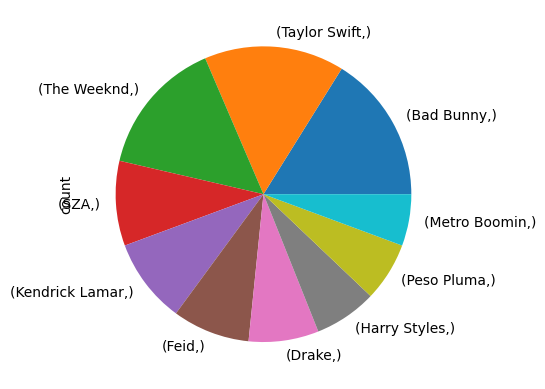

In [35]:
shortlist_artists = pd.DataFrame(list_artists.value_counts().head(10))
shortlist_plot = list_artists.value_counts().head(10).plot(kind='pie')
shortlist_artists

<h3>Isn't that much more clearer???</h3>

You can also do the same with the bar charts, if you want to try.

Now at last, let's take a comparison between all charts regarding those artists:

In [61]:
charts_artists_df = pd.DataFrame({
    'artist(s)_name': data['artist(s)_name'].tolist(),
    'in_deezer_charts': data['in_deezer_charts'].tolist(),
    'in_spotify_charts': data['in_spotify_charts'].tolist(),
    'in_apple_charts': data['in_apple_charts'].tolist(),
    'streams': data['streams'].tolist()
})

charts_artists_df = charts_artists_df.explode('artist(s)_name')

top10artists = ['Bad Bunny', 'Taylor Swift', 'The Weeknd', 'SZA', 'Kendrick Lamar', 'Feid', 'Drake', 'Harry Styles', 'Peso Pluma', 'Metro Boomin']

charts_artists_df = charts_artists_df.groupby('artist(s)_name')[['in_deezer_charts', 'in_spotify_charts', 'in_apple_charts']].sum().reset_index()
charts_artists_df = charts_artists_df.loc[charts_artists_df['artist(s)_name'].isin(top10artists)]
charts_artists_df

,artist(s)_name,in_deezer_charts,in_spotify_charts,in_apple_charts
67,Bad Bunny,162,675,2315
181,Drake,1,97,964
206,Feid,91,445,809
246,Harry Styles,76,185,545
320,Kendrick Lamar,0,38,296
426,Metro Boomin,28,250,689
495,Peso Pluma,78,373,1904
545,SZA,27,114,1271
609,Taylor Swift,58,544,1945
629,The Weeknd,73,555,2608


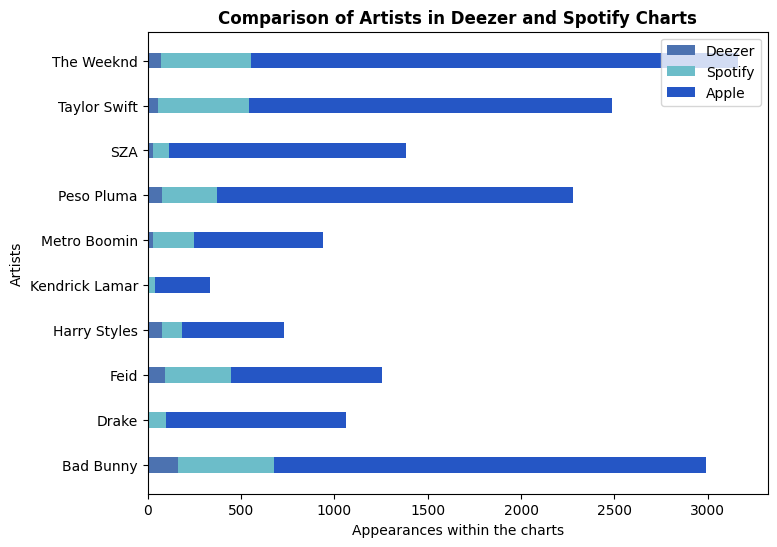

In [70]:
index = charts_artists_df['artist(s)_name'].tolist()
value1 = charts_artists_df['in_deezer_charts'].tolist()
value2 = charts_artists_df['in_spotify_charts'].tolist()
value3 = charts_artists_df['in_apple_charts'].tolist()

# Create a horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
bar1 = ax.barh(index, value1, bar_width, label='Deezer', color='#4c72b0')
bar2 = ax.barh(index, value2, bar_width, left=value1, label='Spotify', color='#6cbdc9')
bar3 = ax.barh(index, value3, bar_width, left=value2, label='Apple', color='#2556c5')

# Add labels and legend
ax.set_xlabel('Appearances within the charts')
ax.set_ylabel('Artists')
ax.set_title('Comparison of Artists in Deezer and Spotify Charts', fontweight='bold')
ax.legend(loc='upper right')


plt.show()

This is how to make a much clearer chart, with an accurate touch of the details. Impressive.